In [36]:
from matplotlib import pyplot as plt
from importlib import reload
plt=reload(plt)
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder as le

In [95]:
Data=pd.read_csv("C:\\Users\\Lenovo\\Desktop\\weatherAUS.csv")
Data['RainToday'].replace(['Yes', 'No'],[1, 0], inplace=True)
Data['RainTomorrow'].replace(['Yes', 'No'],[1, 0], inplace=True)

Data=Data.fillna(0)
Data.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'] ,axis=1, inplace=True)



data=Data.values
data = (data - data.min(axis = 0)) / ( data.max(axis = 0) - data.min(axis = 0) )*9 + 1


datapoints, features = Data.shape



In [154]:
#init centers
# while not converged:
# update cluster membership
#update centers

18

In [171]:

def random_centers(k):
    np.random.seed(1)
    centers=data[np.random.choice(datapoints, k, replace=False)]
    return centers
def Eucledian(x1, x2):
    return np.linalg.norm(x1-x2, axis=1)
def cluster_assgn(k, centers):    

    distances = np.zeros((datapoints,k))
    clusters=[[] for _ in range(k)]
    cluster_assignments=np.zeros(datapoints)
    for i in range(k):
        distances[:,i] = Eucledian(data, centers[i])
    cluster_assignments=np.argmin(distances, axis=1)
    return cluster_assignments
    

def variation(k, centers):
    cluster_assignments=cluster_assgn(k, centers)
    clusters=[[] for _ in range(k)]
    for i in range(datapoints):
        index=(cluster_assignments[i])
        clusters[index].append(i)
    values=[[] for _ in range(k)]
    for i in range(k):
        for j in clusters[i]:
            values[i].append(data[j])
    values=np.array(values, dtype=object)
    
    variation=0
    for i in range(k):
        for j in values[i]:
            variation+=np.linalg.norm(j-centers[i])
    return variation


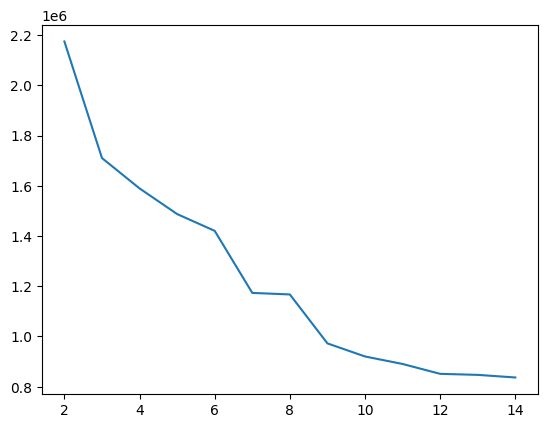

In [177]:
x=range(2, 15)
y=[]
for k in range(2,15):
    centers=random_centers(k)
    y.append(variation(k, centers))

plt.plot(x, y)

In [231]:
def new_centers( k, centers):   
    cluster_assignments=cluster_assgn(k, centers)
    for i in range(k):    
        centers[i, :]=data[cluster_assignments==i].mean(axis=0)
    return centers
centers=random_centers(7)
for i in range(100):
    newcenters=new_centers(7, centers)
    centers=newcenters
    fin=i
    if np.sum(centers-new_centers(7, centers))==0:
        break

    

    

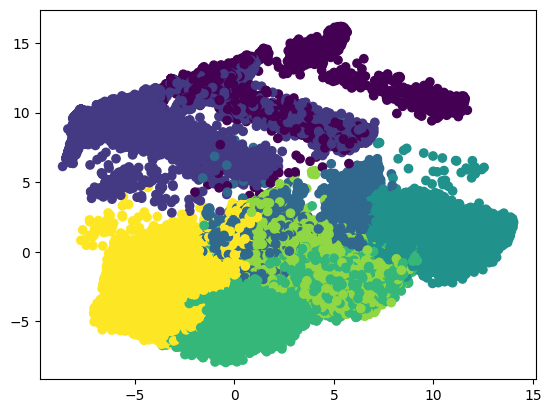

In [234]:
#PCA Plot

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

l = cluster_assgn(7, centers)
arr = np.array(data)

df_2d = pca.fit_transform(arr)

plt.scatter(df_2d[:, 0], df_2d[:, 1], c = l)

In [52]:
import numpy as np
X = np.array([[1, 2, 3], [7, 8, 9], [4, 5, 6]]) -np.array([[4,5,6], [4,5,6], [4,5,6]])

U, s, Vt = np.linalg.svd(X)
top_s = s[0]
top_left_sing_vec = U[:, 0]
top_right_sing_vec = Vt[0, :]

print(np.dot(X,top_left_sing_vec.T))




[0. 0. 0.]
